# TimeSeries    

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

## Time Series Analysis

In [3]:
data ={'date':['2018-01-01','2018-02-01',
'2018-03-01', '2018-04-01',
'2018-05-01', '2018-06-01',
'2018-01-01', '2018-02-01',
'2018-03-01', '2018-04-01',
'2018-05-01', '2018-06-01'],
'visitors': [35,30,82,26,
83, 46,40,57,95,57,87,42]}

In [4]:
df =pd.DataFrame(data,
columns=['date', 'visitors'])

Convert Pandas columns into date objects.

In [5]:
df['date'] =pd.to_datetime(df['date'])

In [6]:
# set an index and sort the dataframe by that index.
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

In [7]:
df.head()

,visitors
date,
2018-01-01,35
2018-01-01,40
2018-02-01,30
2018-02-01,57
2018-03-01,82


In [8]:
df

,visitors
date,
2018-01-01,35
2018-01-01,40
2018-02-01,30
2018-02-01,57
2018-03-01,82
2018-03-01,95
2018-04-01,26
2018-04-01,57
2018-05-01,83


In [9]:
#filter by date
df.loc['2018-05']

,visitors
date,
2018-05-01,83
2018-05-01,87


In [10]:
df[datetime(2018,3,1):]

,visitors
date,
2018-03-01,82
2018-03-01,95
2018-04-01,26
2018-04-01,57
2018-05-01,83
2018-05-01,87
2018-06-01,46
2018-06-01,42


In [11]:
df.truncate(after='2018-03-01')

,visitors
date,
2018-01-01,35
2018-01-01,40
2018-02-01,30
2018-02-01,57
2018-03-01,82
2018-03-01,95


In [12]:
df.groupby('date').count()

,visitors
date,
2018-01-01,2
2018-02-01,2
2018-03-01,2
2018-04-01,2
2018-05-01,2
2018-06-01,2


In [13]:
# The resample method lets us change the frequency in our dataset.
df.resample('ME').mean()

,visitors
date,
2018-01-31,37.5
2018-02-28,43.5
2018-03-31,88.5
2018-04-30,41.5
2018-05-31,85.0
2018-06-30,44.0


In [14]:
df.resample('ME').sum()

,visitors
date,
2018-01-31,75
2018-02-28,87
2018-03-31,177
2018-04-30,83
2018-05-31,170
2018-06-30,88


 Offset aliases used by Pandas to represent common time series frequencies.
Alias Description
B   businessdayfrequency
C   custombusinessdayfrequency
D   calendardayfrequency
W   weeklyfrequency
M   month-endfrequency
SM  semi-month-end frequency(15th and end of month)
BM  businessmonth-endfrequency
CBM custombusinessmonth-endfrequency
MS  month-startfrequency
SMS semi-month-startfrequency(1stand15th)
BMS businessmonthstartfrequency
CBMS    custombusinessmonth-startfrequency
Q   quarter-endfrequency
BQ  businessquarter-endfrequency
QS  quarterstartfrequency
BQS businessquarter-startfrequency
A,  Yyear-endfrequency
BA, BYbusinessyear-endfrequency
AS, YS year-startfrequency
BAS, BYS business year-startfrequency
BH  business hour frequency
H   hourly frequency
T,  min minutelyfrequency
S   secondlyfrequency
L,  ms milliseconds
U,  us microseconds
N   nanoseconds

In [15]:
df.groupby('date').describe()

visitors                                                 
              count  mean        std   min    25%   50%    75%   max
date                                                                
2018-01-01      2.0  37.5   3.535534  35.0  36.25  37.5  38.75  40.0
2018-02-01      2.0  43.5  19.091883  30.0  36.75  43.5  50.25  57.0
2018-03-01      2.0  88.5   9.192388  82.0  85.25  88.5  91.75  95.0
2018-04-01      2.0  41.5  21.920310  26.0  33.75  41.5  49.25  57.0
2018-05-01      2.0  85.0   2.828427  83.0  84.00  85.0  86.00  87.0
2018-06-01      2.0  44.0   2.828427  42.0  43.00  44.0  45.00  46.0

In [16]:
# We can provide a data in plain natural language, and convert it to a datetype.
date=pd.to_datetime("14th of October, 2016")
print(date)

2016-10-14 00:00:00


In [17]:
# Someformatdirectives for the strftime method.
""" 
Directive Meaning
%a abbreviatedweekdayname
%A full weekdayname
%b abbreviatedmonthname
%B full monthname
%c preferreddateandtimerepresentation
%d dayofthemonth(1 to 31)
%D same as%m/%d/%y
%e dayofthemonth(1 to 31)
%m month (1 to 12)
%M minute
%S second
%u weekdayasanumber(Mon=1 to 7)
"""


' \nDirective Meaning\n%a abbreviatedweekdayname\n%A full weekdayname\n%b abbreviatedmonthname\n%B full monthname\n%c preferreddateandtimerepresentation\n%d dayofthemonth(1 to 31)\n%D same as%m/%d/%y\n%e dayofthemonth(1 to 31)\n%m month (1 to 12)\n%M minute\n%S second\n%u weekdayasanumber(Mon=1 to 7)\n'

In [18]:
date.strftime('%A')


'Friday'

In [19]:
print( date.strftime('%B'), ',' , date.strftime('%u'))

October , 5


In [20]:
# timerange by specifying start and end times.
pd.date_range('2018-05-30', '2018-06-02')

DatetimeIndex(['2018-05-30', '2018-05-31', '2018-06-01', '2018-06-02'], dtype='datetime64[ns]', freq='D')

In [21]:
pd.date_range('2018-05-30', periods=4)

DatetimeIndex(['2018-05-30', '2018-05-31', '2018-06-01', '2018-06-02'], dtype='datetime64[ns]', freq='D')

In [22]:
pd.date_range('2018-05-30', periods=4,freq='M')

C:\Users\david\AppData\Local\Temp\ipykernel_10020\1679683048.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range('2018-05-30', periods=4,freq='M')


DatetimeIndex(['2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31'], dtype='datetime64[ns]', freq='ME')

In [23]:
from numpy.random import randn
idx =pd.date_range('2018-06-04 00:00:00',
periods=4)
cols =['A','B','C','D']

In [24]:
# creates an array of m with rows and n columns.
data =randn(len(idx),len(cols))

In [25]:
df =pd.DataFrame(data=data,
index=idx, columns=cols)
df.index.name='date'


In [26]:
df

,A,B,C,D
date,,,,
2018-06-04,0.341498,0.790447,0.190868,0.763366
2018-06-05,0.522534,0.867113,-0.187947,-1.631723
2018-06-06,-0.731990,0.247285,-0.541047,0.267817
2018-06-07,-1.287042,-0.078956,1.238060,1.388917


In [27]:
df.reset_index(inplace=True)

In [28]:
melted=pd.melt(df,id_vars='date',
var_name='feature',
value_name='reading')
print(melted)

         date feature   reading
0  2018-06-04       A  0.341498
1  2018-06-05       A  0.522534
2  2018-06-06       A -0.731990
3  2018-06-07       A -1.287042
4  2018-06-04       B  0.790447
5  2018-06-05       B  0.867113
6  2018-06-06       B  0.247285
7  2018-06-07       B -0.078956
8  2018-06-04       C  0.190868
9  2018-06-05       C -0.187947
10 2018-06-06       C -0.541047
11 2018-06-07       C  1.238060
12 2018-06-04       D  0.763366
13 2018-06-05       D -1.631723
14 2018-06-06       D  0.267817
15 2018-06-07       D  1.388917


The original columns have become entries in the column called “features” and the values are in the column “reading”.

## Data Manipulation

In [29]:
# sample dataset Apple Inc Prices Apr 2017 - Apr 2018
url='https://figshare.com/articles/dataset/Apple_Inc_Prices_Apr_2017_-_Apr_2018/6339830/1?file=11624558'

In [30]:
appl =pd.read_csv('AAPL.CSV')
appl.Date =pd.to_datetime(appl.Date,
format='%Y-%m-%d')

In [31]:
appl.set_index('Date', inplace=True)

In [32]:
appl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-25,143.910004,144.899994,143.869995,144.529999,142.279205,18871500
2017-04-26,144.470001,144.600006,143.380005,143.679993,141.442444,20041200
2017-04-27,143.919998,144.160004,143.309998,143.789993,141.550735,14246300
2017-04-28,144.089996,144.300003,143.270004,143.649994,141.412918,20860400
2017-05-01,145.100006,147.199997,144.960007,146.580002,144.297287,33602900


In [33]:
# The diff method calculates the difference from one time period to the next.
appl['log_ret'] =np.log(appl.Close).diff()

In [34]:
appl['log_ret'].tail(3)

Date
2018-04-23   -0.002901
2018-04-24   -0.014017
2018-04-25    0.004348
Name: log_ret, dtype: float64

### Bitcoin

In [35]:
from datetime import datetime

""" 
we will notice that the date is stored in a column called time_start, and that the format is such that
the day is placed first, followed by the month and the year; the time in hours and minutes is provided. We can use this
information to create a rule to parse the date:
"""
parser =lambda date: datetime.\
    strptime(date, '%d/%m/%Y %H:%M')

In [36]:
# Wespecifythecolumnstobe parsed andhowtheyshallbe parsed!
fname ='bitcoin_usd.csv'
bitcoin =pd.read_csv(fname,
parse_dates=['time_start'],
date_parser=parser,
index_col='time_start')

C:\Users\david\AppData\Local\Temp\ipykernel_10020\1015902748.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bitcoin =pd.read_csv(fname,


In [37]:
ticks =bitcoin[['close','volume']]

In [38]:
ticks.resample('5Min').first()

,close,volume
time_start,,
2016-03-31 00:00:00,413.27,8.953746
2016-03-31 00:05:00,413.26,0.035157
2016-03-31 00:10:00,413.51,43.640052
2016-03-31 00:15:00,414.98,0.038896
2016-03-31 00:20:00,414.98,0.241800
...,...,...
2016-04-03 23:35:00,420.60,0.000000
2016-04-03 23:40:00,NaN,NaN
2016-04-03 23:45:00,NaN,NaN


In [39]:
ticks.resample('5Min').mean()

,close,volume
time_start,,
2016-03-31 00:00:00,413.270000,2.735987
2016-03-31 00:05:00,413.264000,2.211749
2016-03-31 00:10:00,414.660000,37.919166
2016-03-31 00:15:00,414.982000,5.574657
2016-03-31 00:20:00,414.986000,0.063756
...,...,...
2016-04-03 23:35:00,420.600000,0.000000
2016-04-03 23:40:00,NaN,NaN
2016-04-03 23:45:00,NaN,NaN


In [40]:
"""
In thiswaywecouldgettheclosingpriceforthedayby
resamplingbydayandrequestingthelastvalue:
"""
ticks.resample('D').last()

,close,volume
time_start,,
2016-03-31,416.02,0.200000
2016-04-01,417.90,52.099684
2016-04-02,420.30,0.850000
2016-04-03,420.60,0.984358


In [41]:
"""The ohlc() method letsusfindthe
OHLC pricesforournewsampled
data."""
bars=ticks['close'].resample('5Min').ohlc()
           

In [42]:
""" 
Pandas willtakethefirstandlastvaluesintheintervaltobe
the openandcloseforthebar.Thenitwilltakethemaxand
min asthehighandlow,respectively.Inthisway,westart
filtering thedata.Forexample,imagineweareinterestedin
the pricesbetween10amand4pmeachday: 
"""
filtered=bars.between_time('10:00', '16:00')

In [43]:
bars.open.at_time('8:00') 

time_start
2016-03-31 08:00:00    416.11
2016-04-01 08:00:00    416.02
2016-04-02 08:00:00    420.69
2016-04-03 08:00:00    418.78
Freq: 1440min, Name: open, dtype: float64

In [44]:
bars.open.at_time('8:00').pct_change()

time_start
2016-03-31 08:00:00         NaN
2016-04-01 08:00:00   -0.000216
2016-04-02 08:00:00    0.011225
2016-04-03 08:00:00   -0.004540
Freq: 1440min, Name: open, dtype: float64

In [45]:
bars.tail()

,open,high,low,close
time_start,,,,
2016-04-03 23:35:00,420.6,420.6,420.6,420.6
2016-04-03 23:40:00,NaN,NaN,NaN,NaN
2016-04-03 23:45:00,NaN,NaN,NaN,NaN
2016-04-03 23:50:00,420.6,420.6,420.6,420.6
2016-04-03 23:55:00,421.0,421.0,420.6,420.6


In [46]:
bars.fillna(method='ffill',limit=1)

C:\Users\david\AppData\Local\Temp\ipykernel_10020\733771188.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bars.fillna(method='ffill',limit=1)


,open,high,low,close
time_start,,,,
2016-03-31 00:00:00,413.27,413.27,413.27,413.27
2016-03-31 00:05:00,413.26,413.28,413.25,413.28
2016-03-31 00:10:00,413.51,414.98,413.51,414.98
2016-03-31 00:15:00,414.98,414.99,414.98,414.98
2016-03-31 00:20:00,414.98,414.99,414.98,414.99
...,...,...,...,...
2016-04-03 23:35:00,420.60,420.60,420.60,420.60
2016-04-03 23:40:00,420.60,420.60,420.60,420.60
2016-04-03 23:45:00,NaN,NaN,NaN,NaN


In [47]:
#Use obj.ffill()
#previos command bars.fillna(method='ffill',limit=1)
bars.ffill()

,open,high,low,close
time_start,,,,
2016-03-31 00:00:00,413.27,413.27,413.27,413.27
2016-03-31 00:05:00,413.26,413.28,413.25,413.28
2016-03-31 00:10:00,413.51,414.98,413.51,414.98
2016-03-31 00:15:00,414.98,414.99,414.98,414.98
2016-03-31 00:20:00,414.98,414.99,414.98,414.99
...,...,...,...,...
2016-04-03 23:35:00,420.60,420.60,420.60,420.60
2016-04-03 23:40:00,420.60,420.60,420.60,420.60
2016-04-03 23:45:00,420.60,420.60,420.60,420.60


In [48]:
filledbars =bars.ffill()

In [49]:
volume =ticks.volume.resample('5Min').sum()
vol =volume.fillna(0.)

<Axes: >

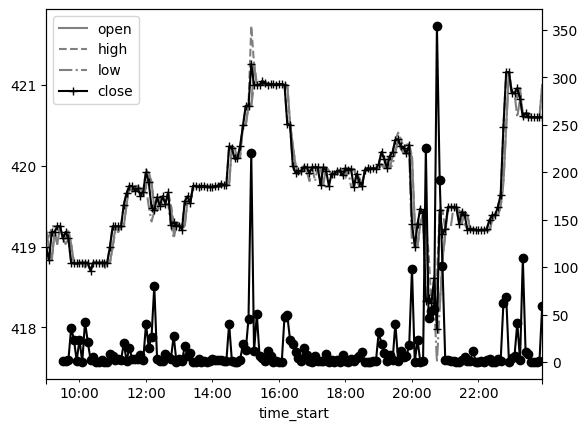

In [55]:
filledbars.loc['2016-04-03'].between_time('9:00',\
'23:59').plot(\
color=['gray','gray','gray','k'],
style=['-','--','-.','-+'])
vol.loc['2016-04-03'].between_time('9:30','23:59')\
.plot(secondary_y=True, style='k-o')

## Modelling TimeSeriesData

In [ ]:
"""  Whitenoisewithzero
mean, constantvariance,andzero
correlation. """
white =2*np.random.random(size=2048)-1
white =pd.Series(white)

<Axes: >

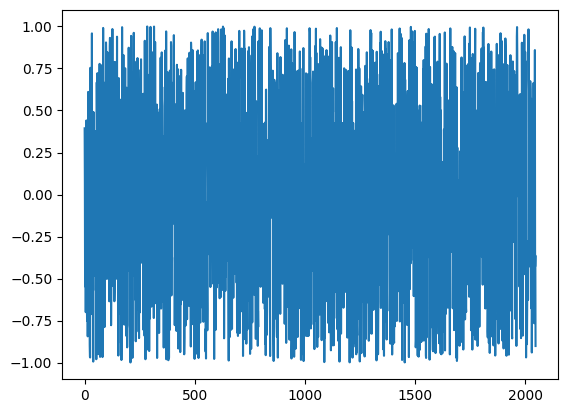

In [58]:
white.plot()

In [ ]:
# calculate the auto correlation for our generated white noise:
for lag in range(1,5):
    print("Autocorrelation at lag={0} is {1}".\
    format(lag, white.autocorr(lag)))

Autocorrelation atlag=1is0.007820099356579626
Autocorrelation atlag=2is0.06099012116136846
Autocorrelation atlag=3is-0.010972522181366918
Autocorrelation atlag=4is0.01308620527864973


In [ ]:
""" We can calculate moving averages and exponential
smoothing on a time series with Pandas.

For averages,we simply use the rolling method for Pandas
dataframes.
 """
appl['MA3']=appl['Close'].rolling(window=3).mean()

In [62]:
alpha=0.6
appl['EWMA']=appl['Close'].ewm(alpha=alpha).mean()

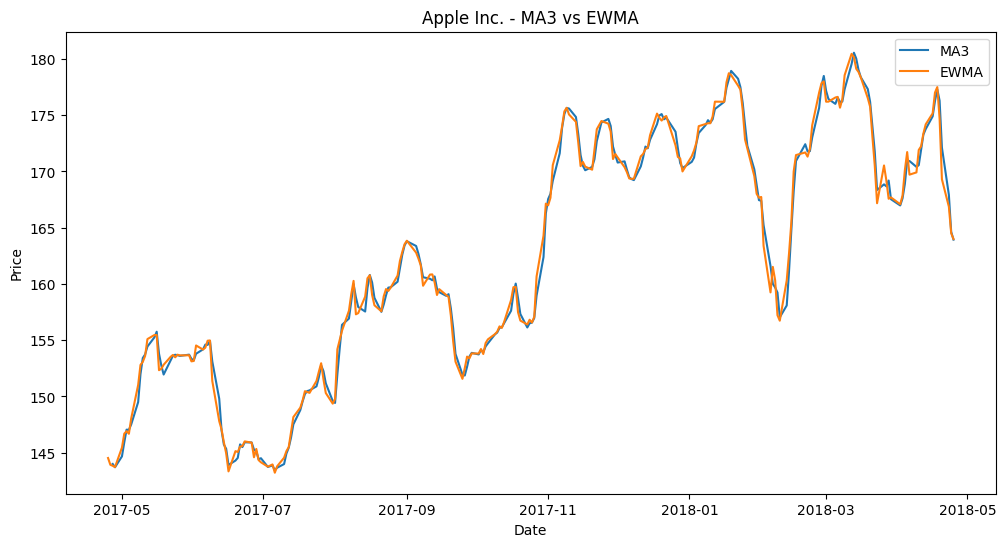

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(appl['MA3'], label='MA3')
plt.plot(appl['EWMA'], label='EWMA')
plt.title('Apple Inc. - MA3 vs EWMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### sunspots

In [79]:
sun =pd.read_csv('sunspots_month.csv', names=['Year', 'Value'], skiprows=1)
sun.Year =pd.to_datetime(sun.Year,
format='%Y-%m-%d')
sun.set_index('Year', inplace=True)

In [80]:
sun.head()

,Value
Year,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


In [81]:
sun_year =sun.resample('YE').mean()

In [66]:
# importing fast fourier transform
from scipy import fftpack

In [70]:
print(sun_year.columns)

Index(['Value'], dtype='object')


In [83]:
Y=fftpack.fft(sun_year['Value'].values)
n=int(len(Y)/2)

In [84]:
freq=np.array(range(n))/(2*n)
period=1./freq

C:\Users\david\AppData\Local\Temp\ipykernel_10020\904230987.py:2: RuntimeWarning: divide by zero encountered in divide
  period=1./freq


In [85]:
power=abs(Y[1:n])**2

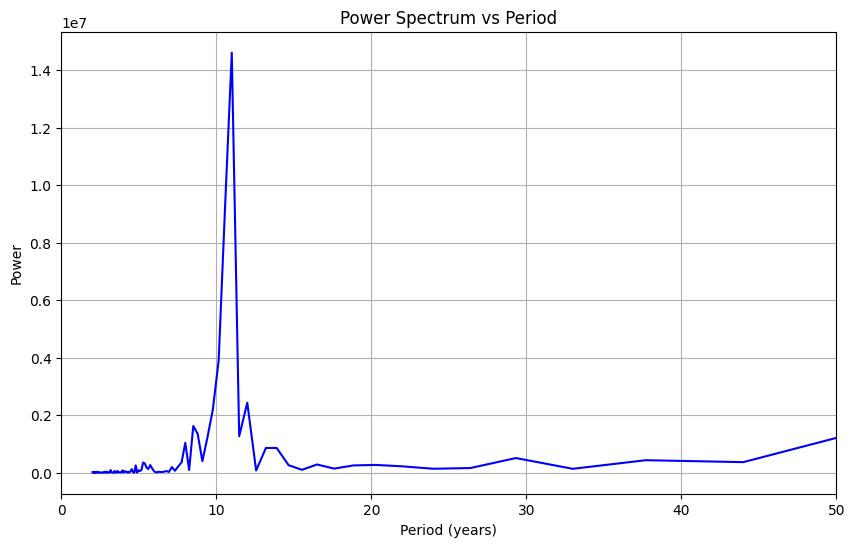

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(period[1:], power, color='blue')
plt.xlabel('Period (years)')
plt.ylabel('Power')
plt.title('Power Spectrum vs Period')
plt.xlim([0, 50])
plt.grid(True)
plt.show()

In [87]:
rolling_mean =sun_year['Value'].rolling(2).mean()
rolling_std =sun_year['Value'].rolling(2).std()

<Axes: xlabel='Year'>

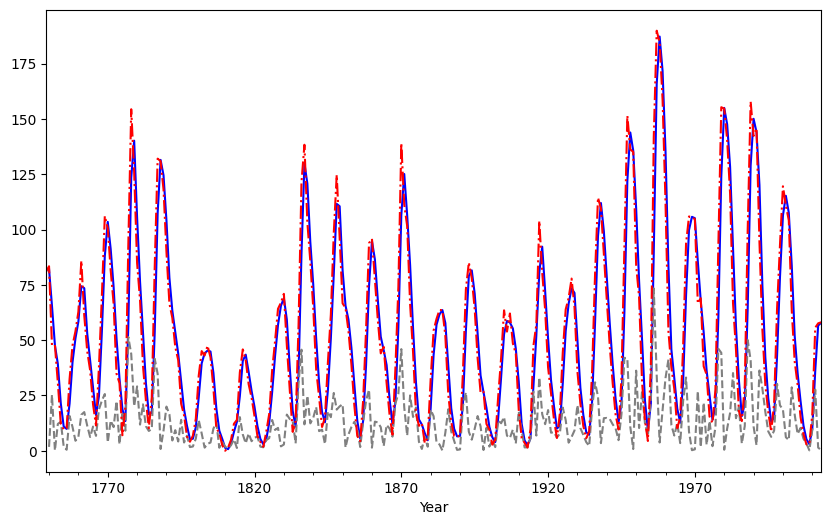

In [97]:
plt.figure(figsize=(10, 6))

rolling_mean.plot(color='blue', style='-', label='rolling mean')
rolling_std.plot(color='gray', style='--',label='rolling std')
sun_year.Value.plot(color='red', style='-.',label='sun year')

In [98]:
from  statsmodels.tsa.stattools import adfuller
df_test =adfuller(sun_year['Value'],autolag='AIC')

In [108]:
""" 
WecannowtakealookattheresultsoftheDickey-Fuller
test withthefollowingfunction: """
def isstationary(df_test):
    stationary=[]
    print('Test Statistic is {0} '.format(df_test[0]))
    print('p-value is {0} '.format(df_test[1]))
    print('No. lags used= {0} '.format(df_test[2]))
    print('No. observations used= {0} '.\
        format(df_test[3]))
    for key,value in df_test[4].items():
        print('Critical Value({0}) = {1}'.\
        format(key, value))
        if df_test[0]<=value:
            stationary.append(True)
        else:
            stationary.append(False)
    return all(stationary)

In [101]:
isstationary(df_test)

Test Statisticis-2.4708472868362907
p-value is0.12272956184228795
No. lagsused=8
No. observationsused=256
Critical Value(1%)=-3.4561550092339512
Critical Value(5%)=-2.8728972266578676
Critical Value(10%)=-2.5728222369384763


False

In [103]:
""" 
Since wehaveseenthatwehaveaseasonalityofaround 11
years,wewillusethisinformationtodecomposeourtime
series:
"""
import statsmodels.api as sm
dec_sunspots =sm.tsa.seasonal_decompose(sun_year,\
model='additive', period=11)

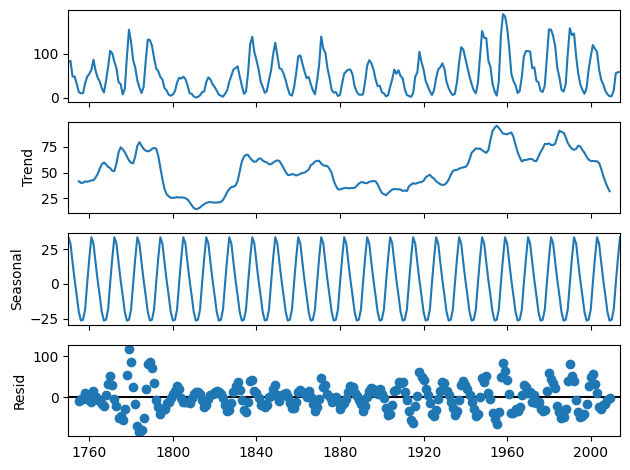

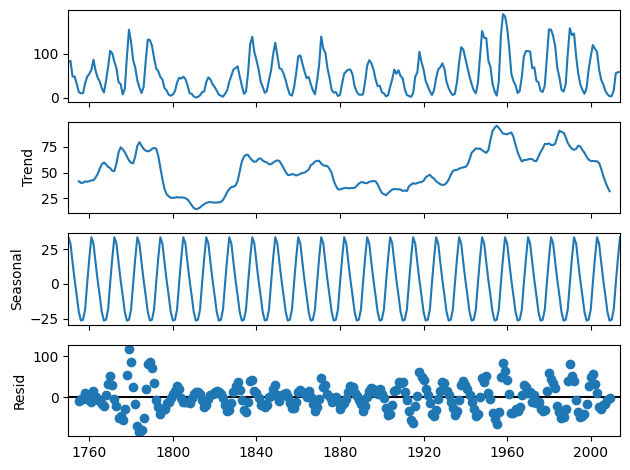

In [104]:
dec_sunspots.plot()

In [106]:
"""Let usapplytheDickey-Fullertesttothebitcointickdata
defined onpage 26. Letusresamplethedataon 15-minute
intervalsandtaketheaverage:""""Math for Data Science.ipynb"
closing_bitcoin=ticks['close'].\
resample('15Min').mean()
df_test_bitcoin =adfuller(closing_bitcoin,\
autolag='AIC')

In [109]:
isstationary(df_test_bitcoin)

Test Statistic is -1.4531293932585259 
p-value is 0.5565571771135547 
No. lags used= 10 
No. observations used= 373 
Critical Value(1%) = -3.448003816652923
Critical Value(5%) = -2.86931999731073
Critical Value(10%) = -2.5709145866785503


False

In general, we should test for autocorrelation at lags 1 to n/4, where n is the total number of observations in the analysis. Estimates at longer lags have been shown to be statistically unreliable

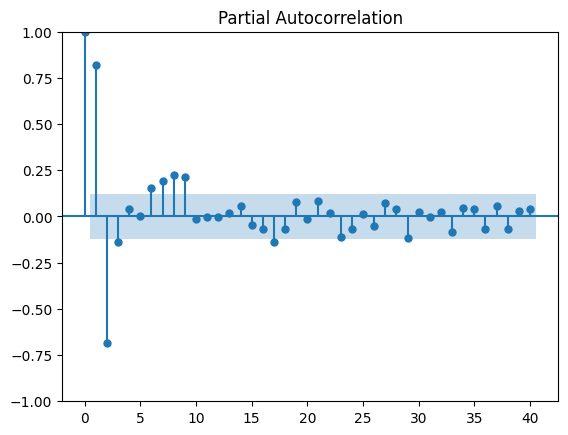

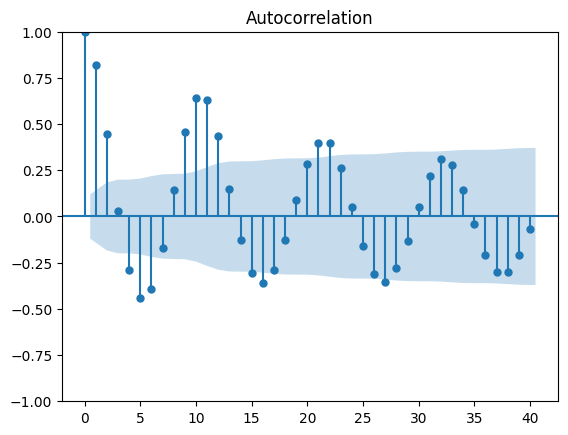

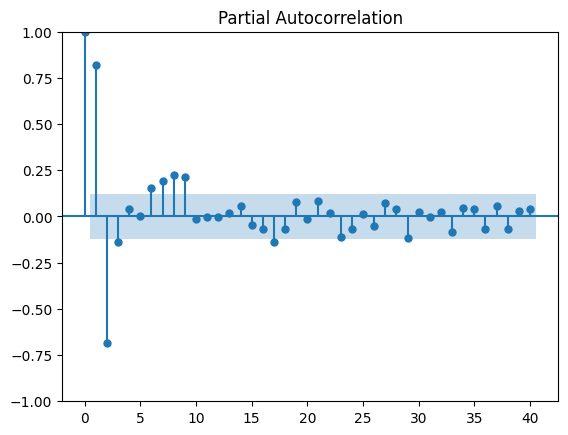

: 

In [ ]:
sm.graphics.tsa.plot_acf(sun_year, lags=40)
sm.graphics.tsa.plot_pacf(sun_year, lags=40)

This figure, shows the result of the code above. We can see in the upper panel that the autocorrelation shows a periodic structure,reflecting the seasonality in the time series.

In [ ]:
#   Time Series Analysis: Forecasting and Control,5th Edition, by George E. P. Box, Gwilym M. Jenkins, Gregory C. Reinsel and Greta M. Ljung, 2015. Published by John Wiley and Sons Inc., Hoboken, New Jersey, pp. 712. ISBN: 978-1-118-67502-1
font_url="https://www.researchgate.net/publication/299459188_Time_Series_Analysis_Forecasting_and_Control5th_Edition_by_George_E_P_Box_Gwilym_M_Jenkins_Gregory_C_Reinsel_and_Greta_M_Ljung_2015_Published_by_John_Wiley_and_Sons_Inc_Hoboken_New_Jersey_pp_712_ISBN_"